In [1]:
from sklearn.datasets import fetch_mldata

In [2]:
mnist = fetch_mldata('mnist-original')

C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22. Please use fetch_openml.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:

• A DESCR key describing the dataset 

• A data key containing an array with one row per instance and one column per feature 

• A target key containing an array with the labels 

In [4]:
x,y = mnist['data'],mnist['target']

In [5]:
x.shape

(70000, 784)

There are 70,000 images, and each image has 784 features.

In [6]:
y.shape

(70000,)

In [7]:
x_train,x_test,y_train,y_test = x[:60000],x[60000:],y[:60000],y[60000:]

we have seprated our training and testing data above now lets import the classifer we want to test on


In [10]:
#lets import logistic regression classifier
from sklearn.linear_model import LogisticRegression

In [14]:
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [15]:
logisticRegr.fit(x_train, y_train)

C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Api\AppData\Local\Continuum\anaconda3\lib\site-packages\

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
y_predict =logisticRegr.predict(x_test)

In [18]:
y_predict

array([0., 0., 0., ..., 9., 9., 9.])

In [19]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9179


In [20]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_predict))

Accuracy: 0.9179


We have successfully classified our MNIST data with a accuracy of 91.7%

# Display Misclassified images with Predicted Labels (MNIST)

In [21]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_predict):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

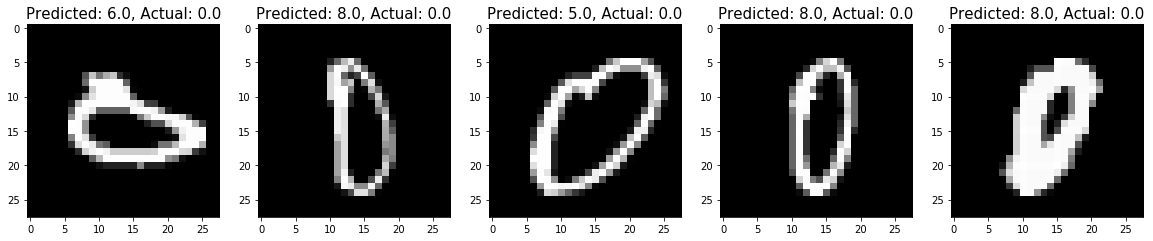

In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(x_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_predict[badIndex], y_test[badIndex]), fontsize = 15)